In [1]:
from keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.
/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Train- and test-data.

In [2]:
(x_input_train, y_output_train), (x_input_test, y_output_test) = mnist.load_data()
x_input_train = x_input_train.astype("float32") / 255.0
x_input_test = x_input_test.astype("float32") / 255.0
print(x_input_train.shape)
print(x_input_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Triplet loss.

In [3]:
latent_dim = 8

# Create the base-model.
base_input = layers.Input(shape=(28, 28))
base_output = base_input
base_output = layers.Flatten()(base_output)
base_output = layers.Dense(512, activation="relu")(base_output)
base_output = layers.Dense(256, activation="relu")(base_output)
base_output = layers.Dense(128, activation="relu")(base_output)
base_output = layers.Dense(latent_dim)(base_output)
base = models.Model(base_input, base_output)

# Create the triplet loss model.
tl = ngdlmodels.TL(base)
tl.compile(optimizer="rmsprop", triplet_loss="euclidean")
#tl.summary()

# Train.
print("Train...")
history = tl.fit(
        x_input_train, y_output_train,
        epochs=1000,
        batch_size=128,
        steps_per_epoch=1000,
        minibatch_size=10,
        shuffle=True,
        validation_data=(x_input_test, y_output_test),
        validation_steps=500
    )

Train...
Epoch 1/1000...
loss [0.0017186210826039313]
val_loss [0.20574285089969635]
Epoch 2/1000...
loss [0.0020441418099217115]
val_loss [0.4484347105026245]
Epoch 3/1000...
loss [0.002183390476508066]
val_loss [0.28454840183258057]
Epoch 4/1000...
loss [0.0015316240177489816]
val_loss [0.42109164595603943]
Epoch 5/1000...
loss [0.0016533679028507323]
val_loss [0.25156718492507935]
Epoch 6/1000...
loss [0.0014523014763835817]
val_loss [0.3198523223400116]
Epoch 7/1000...
loss [0.0013537806265521795]
val_loss [0.23957034945487976]
Epoch 8/1000...
loss [0.0013028088053688408]
val_loss [0.36163753271102905]
Epoch 9/1000...
loss [0.0013707199129275977]
val_loss [0.2696491479873657]
Epoch 10/1000...
loss [0.0009150428883731365]
val_loss [0.34258705377578735]
Epoch 11/1000...
loss [0.0010692744057159871]
val_loss [0.3054060935974121]
Epoch 12/1000...
loss [0.0010381809901446105]
val_loss [0.3244043290615082]
Epoch 13/1000...
loss [0.000977620752993971]
val_loss [0.2717801034450531]
Epoch 1

loss [0.0003118664622306824]
val_loss [0.10888828337192535]
Epoch 109/1000...
loss [0.00015544043690897524]
val_loss [0.15100343525409698]
Epoch 110/1000...
loss [0.00022847376973368226]
val_loss [0.19515997171401978]
Epoch 111/1000...
loss [0.00018991925567388534]
val_loss [0.1759851574897766]
Epoch 112/1000...
loss [0.0002982492980081588]
val_loss [0.11392100155353546]
Epoch 113/1000...
loss [0.00021494798036292195]
val_loss [0.2862539291381836]
Epoch 114/1000...
loss [0.00022395881684497]
val_loss [0.15153193473815918]
Epoch 115/1000...
loss [0.00032541429065167905]
val_loss [0.21639128029346466]
Epoch 116/1000...
loss [0.0001496690479107201]
val_loss [0.1404544711112976]
Epoch 117/1000...
loss [0.00015180801856331527]
val_loss [0.21744129061698914]
Epoch 118/1000...
loss [0.00018017283803783358]
val_loss [0.17624486982822418]
Epoch 119/1000...
loss [0.0001919743160251528]
val_loss [0.1726999431848526]
Epoch 120/1000...
loss [0.0003498707024846226]
val_loss [0.1647321730852127]
Epoc

loss [0.00016798696015030146]
val_loss [0.15147772431373596]
Epoch 214/1000...
loss [0.0001583233957644552]
val_loss [0.10388492047786713]
Epoch 215/1000...
loss [0.00013321606977842747]
val_loss [0.19020245969295502]
Epoch 216/1000...
loss [0.00016723458957858384]
val_loss [0.11071677505970001]
Epoch 217/1000...
loss [0.00012161896377801895]
val_loss [0.11939737945795059]
Epoch 218/1000...
loss [0.00017037077737040818]
val_loss [0.2443472445011139]
Epoch 219/1000...
loss [0.00017434282787144183]
val_loss [0.17210714519023895]
Epoch 220/1000...
loss [0.0001411864145193249]
val_loss [0.1710367351770401]
Epoch 221/1000...
loss [8.652026206254959e-05]
val_loss [0.13361498713493347]
Epoch 222/1000...
loss [9.774268791079521e-05]
val_loss [0.15922321379184723]
Epoch 223/1000...
loss [0.00018535252171568572]
val_loss [0.10379666090011597]
Epoch 224/1000...
loss [0.0001545804657507688]
val_loss [0.1322489082813263]
Epoch 225/1000...
loss [0.0001577071500942111]
val_loss [0.06050572171807289]


loss [9.249225864186884e-05]
val_loss [0.06931671500205994]
Epoch 319/1000...
loss [8.42302585951984e-05]
val_loss [0.11412370949983597]
Epoch 320/1000...
loss [8.903249446302652e-05]
val_loss [0.1669965386390686]
Epoch 321/1000...
loss [0.00017146380082704127]
val_loss [0.12126325815916061]
Epoch 322/1000...
loss [0.00010501006618142128]
val_loss [0.15541940927505493]
Epoch 323/1000...
loss [0.00016186100244522096]
val_loss [0.12635420262813568]
Epoch 324/1000...
loss [0.00020574185554869472]
val_loss [0.10350019484758377]
Epoch 325/1000...
loss [0.0001333620660007]
val_loss [0.11778964102268219]
Epoch 326/1000...
loss [0.0001426127536688]
val_loss [0.1730116307735443]
Epoch 327/1000...
loss [0.00010595104307867587]
val_loss [0.1164822205901146]
Epoch 328/1000...
loss [0.00010268956725485623]
val_loss [0.09509672224521637]
Epoch 329/1000...
loss [9.11077845375985e-05]
val_loss [0.07465201616287231]
Epoch 330/1000...
loss [0.00011115975608117878]
val_loss [0.11684458702802658]
Epoch 33

loss [0.00013108605053275825]
val_loss [0.12344381213188171]
Epoch 424/1000...
loss [9.266091487370431e-05]
val_loss [0.10545480251312256]
Epoch 425/1000...
loss [0.00013575098454020917]
val_loss [0.09858991950750351]
Epoch 426/1000...
loss [7.386618363671005e-05]
val_loss [0.10122806578874588]
Epoch 427/1000...
loss [0.00014622544054873287]
val_loss [0.12297612428665161]
Epoch 428/1000...
loss [6.526199076324701e-05]
val_loss [0.10736691951751709]
Epoch 429/1000...
loss [6.26953560858965e-05]
val_loss [0.08506569266319275]
Epoch 430/1000...
loss [8.007525862194598e-05]
val_loss [0.12605491280555725]
Epoch 431/1000...
loss [0.00010261553712189197]
val_loss [0.11706124991178513]
Epoch 432/1000...
loss [8.051818166859448e-05]
val_loss [0.18072931468486786]
Epoch 433/1000...
loss [0.0001908175451681018]
val_loss [0.0479915514588356]
Epoch 434/1000...
loss [0.000150189024861902]
val_loss [0.13393348455429077]
Epoch 435/1000...
loss [0.00015443363040685654]
val_loss [0.10338500887155533]
Ep

loss [9.485843777656555e-05]
val_loss [0.06383872777223587]
Epoch 530/1000...
loss [7.704604510217905e-05]
val_loss [0.10821117460727692]
Epoch 531/1000...
loss [3.955943742766976e-05]
val_loss [0.07013608515262604]
Epoch 532/1000...
loss [6.556970649398863e-05]
val_loss [0.10895325988531113]
Epoch 533/1000...
loss [0.0001391552910208702]
val_loss [0.05809110403060913]
Epoch 534/1000...
loss [6.518006301485002e-05]
val_loss [0.09674838185310364]
Epoch 535/1000...
loss [8.854807727038861e-05]
val_loss [0.1370289921760559]
Epoch 536/1000...
loss [7.414963003247976e-05]
val_loss [0.15968134999275208]
Epoch 537/1000...
loss [8.570554596371949e-05]
val_loss [0.06553276628255844]
Epoch 538/1000...
loss [7.266676612198353e-05]
val_loss [0.16773560643196106]
Epoch 539/1000...
loss [5.302841332741082e-05]
val_loss [0.12649498879909515]
Epoch 540/1000...
loss [0.00010381753998808563]
val_loss [0.06866011768579483]
Epoch 541/1000...
loss [0.0001162024571094662]
val_loss [0.12156839668750763]
Epoc

loss [9.329613042064012e-05]
val_loss [0.12347618490457535]
Epoch 635/1000...
loss [4.579318920150399e-05]
val_loss [0.11765739321708679]
Epoch 636/1000...
loss [4.8953296151012185e-05]
val_loss [0.11851944029331207]
Epoch 637/1000...
loss [0.00010211262060329318]
val_loss [0.2057996690273285]
Epoch 638/1000...
loss [5.4795453092083336e-05]
val_loss [0.039639171212911606]
Epoch 639/1000...
loss [0.00010700011160224676]
val_loss [0.21108393371105194]
Epoch 640/1000...
loss [8.407394774258137e-05]
val_loss [0.1970803588628769]
Epoch 641/1000...
loss [6.475979019887745e-05]
val_loss [0.15598899126052856]
Epoch 642/1000...
loss [9.279033611528575e-05]
val_loss [0.10300074517726898]
Epoch 643/1000...
loss [5.589254572987556e-05]
val_loss [0.0996011421084404]
Epoch 644/1000...
loss [9.696761984378099e-05]
val_loss [0.11244906485080719]
Epoch 645/1000...
loss [4.3758472660556436e-05]
val_loss [0.15661844611167908]
Epoch 646/1000...
loss [0.00011129451636224986]
val_loss [0.10646612197160721]


loss [5.446232669055462e-05]
val_loss [0.07645486295223236]
Epoch 740/1000...
loss [8.509634458459914e-05]
val_loss [0.15806354582309723]
Epoch 741/1000...
loss [4.677486256696284e-05]
val_loss [0.093839630484581]
Epoch 742/1000...
loss [3.2862829742953183e-05]
val_loss [0.04413150995969772]
Epoch 743/1000...
loss [4.893605993129313e-05]
val_loss [0.048663429915905]
Epoch 744/1000...
loss [6.69265016913414e-05]
val_loss [0.1042083203792572]
Epoch 745/1000...
loss [6.560492212884128e-05]
val_loss [0.0779254138469696]
Epoch 746/1000...
loss [8.097375952638685e-05]
val_loss [0.029433531686663628]
Epoch 747/1000...
loss [5.7337498292326926e-05]
val_loss [0.09003645181655884]
Epoch 748/1000...
loss [2.719358168542385e-05]
val_loss [0.11502745002508163]
Epoch 749/1000...
loss [6.96469466201961e-05]
val_loss [0.0714879184961319]
Epoch 750/1000...
loss [3.3706649439409374e-05]
val_loss [0.15288123488426208]
Epoch 751/1000...
loss [2.6280973106622696e-05]
val_loss [0.032407697290182114]
Epoch 7

loss [0.00010171907395124436]
val_loss [0.07322019338607788]
Epoch 845/1000...
loss [7.905716216191649e-05]
val_loss [0.061913229525089264]
Epoch 846/1000...
loss [7.546154409646988e-05]
val_loss [0.1444256603717804]
Epoch 847/1000...
loss [4.3996036052703856e-05]
val_loss [0.04625553637742996]
Epoch 848/1000...
loss [4.3378380592912434e-05]
val_loss [0.11727126687765121]
Epoch 849/1000...
loss [9.177834331057966e-05]
val_loss [0.11266199499368668]
Epoch 850/1000...
loss [6.982204341329634e-05]
val_loss [0.12038497626781464]
Epoch 851/1000...
loss [7.036582310684025e-05]
val_loss [0.07668688893318176]
Epoch 852/1000...
loss [4.225723072886467e-05]
val_loss [0.1773126721382141]
Epoch 853/1000...
loss [0.00011231912276707589]
val_loss [0.10742860287427902]
Epoch 854/1000...
loss [6.5445676445961e-05]
val_loss [0.11575762927532196]
Epoch 855/1000...
loss [9.72385611385107e-05]
val_loss [0.15984094142913818]
Epoch 856/1000...
loss [8.041396667249501e-05]
val_loss [0.1519583761692047]
Epoch

loss [4.133873432874679e-05]
val_loss [0.08263383060693741]
Epoch 951/1000...
loss [0.00015140805300325157]
val_loss [0.10336326062679291]
Epoch 952/1000...
loss [4.925735876895487e-05]
val_loss [0.09565716981887817]
Epoch 953/1000...
loss [0.00011991911195218563]
val_loss [0.06082141771912575]
Epoch 954/1000...
loss [3.64182903431356e-05]
val_loss [0.11057274043560028]
Epoch 955/1000...
loss [7.700922223739326e-05]
val_loss [0.060093484818935394]
Epoch 956/1000...
loss [4.9032977782189844e-05]
val_loss [0.09020020812749863]
Epoch 957/1000...
loss [5.5673643248155716e-05]
val_loss [0.14319178462028503]
Epoch 958/1000...
loss [5.105367908254266e-05]
val_loss [0.1208244115114212]
Epoch 959/1000...
loss [4.288551211357117e-05]
val_loss [0.12104073166847229]
Epoch 960/1000...
loss [6.3692212337628e-05]
val_loss [0.09642328321933746]
Epoch 961/1000...
loss [5.579150910489261e-05]
val_loss [0.1958899199962616]
Epoch 962/1000...
loss [5.309094721451402e-05]
val_loss [0.05817005783319473]
Epoc

# Visualizing triplet-loss.

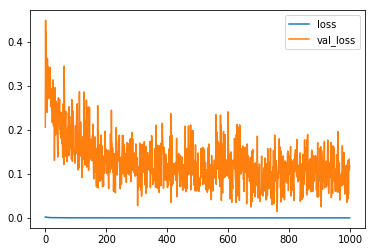

Rendering encodings...


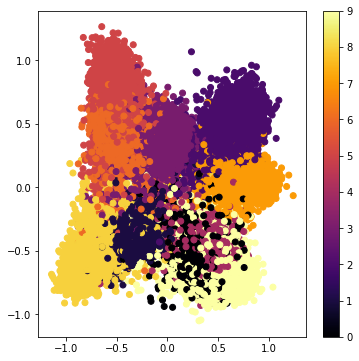

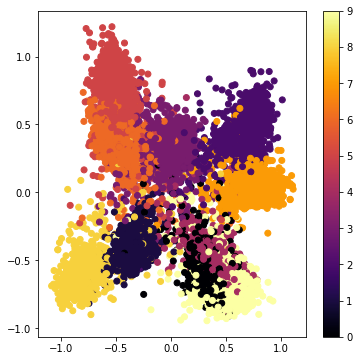

In [4]:
#print("Rendering history...")
ngdlutils.render_history(history)

print("Rendering encodings...")
ngdlutils.render_encodings(tl.base, x_input_train, y_output_train)
ngdlutils.render_encodings(tl.base, x_input_test, y_output_test)

# TODO visualize triplets